In [97]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from konlpy.tag import Twitter
twt = Twitter()
from hanspell import spell_checker
import re
from konlpy.tag import Okt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Kkma
from sklearn.linear_model import Lasso
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import tensorflow as tf
import os
from tqdm.notebook import tqdm
#import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
#from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

C:\Users\jby\AppData\Local\Continuum\anaconda3\envs\textmining\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [98]:
df = pd.read_csv('./result/2021-03-10_21-24-03GS플래쉬.csv')
df.head()

,name,ratings,date,helpful,comment,developer_comment
0,박소영,5,2021-03-10,0,설치하고 오늘 처음 물건 구매해봤는데 앱 사용 시 크게 불편한 점은 없었으나 품목이...,NaN
1,싫어함걷는것을,1,2021-03-10,0,장바구니에 상품을 담았는데 장바구니에서 보이지가 않음. 결국 구매 포기.,NaN
2,권혁윤,5,2021-03-10,0,사용힌기 편리하고 각종 할인이 잘 돼어 있어 좋아요,NaN
3,서승희,5,2021-03-10,0,쿠폰에 빠른배송 GS FRESH 언제까지나 함께합니다.,NaN
4,HH Ch,5,2021-03-10,0,잘 쓰고 있어요~신선한 상품이 많아서 좋아요 ㅎㅎ,NaN


In [99]:
df.describe()

,ratings,helpful
count,9779.000000,9779.000000
mean,4.253298,0.615707
std,1.400829,3.247382
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,148.000000


In [100]:
df = df[['date', 'comment', 'ratings']]

In [101]:
df = df.dropna(axis = 0, how = 'any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9747 entries, 0 to 9778
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     9747 non-null   object
 1   comment  9747 non-null   object
 2   ratings  9747 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 304.6+ KB


In [102]:
from soyspacing.countbase import CountSpace
def 띄어쓰기(text):
    verbose=False
    mc = 10  # min_count
    ft = 0.3 # force_abs_threshold
    nt =-0.3 # nonspace_threshold
    st = 0.3 # space_threshold


    sent_corrected, tags = model.correct(
    doc=text,
    verbose=verbose,
    force_abs_threshold=ft,
    nonspace_threshold=nt,
    space_threshold=st,
    min_count=mc)
    sent_corrected, tags = model.correct(text)
    result = sent_corrected
    return result
corpus_fname = './result/134963_norm.txt'
model = CountSpace()
model.train(corpus_fname)    

df['comment'] = df['comment'].apply(lambda x: 띄어쓰기(x))
df.head()
    
    

all tags length = 694236 --> 57795, (num_doc = 15602)

,date,comment,ratings
0,2021-03-10,설치하고 오늘 처음 물건 구매해봤는데 앱 사용 시 크게 불편한 점은 없었으나 품목이...,5
1,2021-03-10,장바구니에 상품을 담았는데 장바구니에서 보이지가 않음. 결국 구매 포기.,1
2,2021-03-10,사용힌기 편리하고 각종 할인이 잘 돼어 있어 좋아요,5
3,2021-03-10,쿠폰에 빠른배송 GS FRESH 언제까지나 함께합니다.,5
4,2021-03-10,잘 쓰고 있어요~신선한 상품이 많아서 좋아요 ㅎㅎ,5


In [103]:
#맞춤법 검사기
for i in tqdm(range(len(df))): 
    try: 
        result = spell_checker.check(df['comment'][i])
        a= result[1]
        df['comment'][i] = a
    except: 
        pass



C:\Users\jby\AppData\Local\Continuum\anaconda3\envs\textmining\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [104]:
def text_cleaning(text):
    hangul = re.compile('[|ㄱ-ㅎ|ㅏ-ㅣ]+') 
    result = hangul.sub('', text)
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') 
    result = hangul.sub('', text)
    return result
df['ko_text'] = df['comment'].apply(lambda x: text_cleaning(x))
df.head()

,date,comment,ratings,ko_text
0,2021-03-10,설치하고 오늘 처음 물건 구매해봤는데 앱 사용 시 크게 불편한 점은 없었으나 품목이...,5,설치하고 오늘 처음 물건 구매해봤는데 앱 사용 시 크게 불편한 점은 없었으나 품목이...
1,2021-03-10,장바구니에 상품을 담았는데 장바구니에서 보이지가 않음. 결국 구매 포기.,1,장바구니에 상품을 담았는데 장바구니에서 보이지가 않음 결국 구매 포기
2,2021-03-10,사용힌기 편리하고 각종 할인이 잘 돼어 있어 좋아요,5,사용힌기 편리하고 각종 할인이 잘 돼어 있어 좋아요
3,2021-03-10,쿠폰에 빠른배송 GS FRESH 언제까지나 함께합니다.,5,쿠폰에 빠른배송 언제까지나 함께합니다
4,2021-03-10,잘 쓰고 있어요~신선한 상품이 많아서 좋아요 ㅎㅎ,5,잘 쓰고 있어요신선한 상품이 많아서 좋아요 ㅎㅎ


In [105]:
from soynlp.word import WordExtractor
from soynlp.utils import DoublespaceLineCorpus
from soynlp.tokenizer import LTokenizer
word_extractor = WordExtractor(min_frequency=100,
   min_cohesion_forward=0.05,
   min_right_branching_entropy=0.0
)
word_extractor.train(df['ko_text'].values)
words = word_extractor.extract()
words

cohesion_score = {word:score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores=cohesion_score)


training was done. used memory 1.340 Gbry 1.336 Gb
all cohesion probabilities was computed. # words = 355
all branching entropies was computed # words = 11886
all accessor variety was computed # words = 11886


In [106]:
df['nouns'] = df['ko_text'].apply(lambda x: tokenizer.tokenize(x, remove_r=True)) # L과 R 분리하여 R은 삭제
df

,date,comment,ratings,ko_text,nouns
0,2021-03-10,설치하고 오늘 처음 물건 구매해봤는데 앱 사용 시 크게 불편한 점은 없었으나 품목이...,5,설치하고 오늘 처음 물건 구매해봤는데 앱 사용 시 크게 불편한 점은 없었으나 품목이...,"[설치, 오늘, 처음, 물건, 구매, 앱, 사용, 시, 크게, 불편, 점은, 없었으..."
1,2021-03-10,장바구니에 상품을 담았는데 장바구니에서 보이지가 않음. 결국 구매 포기.,1,장바구니에 상품을 담았는데 장바구니에서 보이지가 않음 결국 구매 포기,"[장바구니, 상품, 담았는데, 장바구니, 보이지가, 않음, 결국, 구매, 포기]"
2,2021-03-10,사용힌기 편리하고 각종 할인이 잘 돼어 있어 좋아요,5,사용힌기 편리하고 각종 할인이 잘 돼어 있어 좋아요,"[사용, 편리하고, 각종, 할인, 잘, 돼어, 있어, 좋아요]"
3,2021-03-10,쿠폰에 빠른배송 GS FRESH 언제까지나 함께합니다.,5,쿠폰에 빠른배송 언제까지나 함께합니다,"[쿠폰, 빠른, 언제까지나, 함께합니다]"
4,2021-03-10,잘 쓰고 있어요~신선한 상품이 많아서 좋아요 ㅎㅎ,5,잘 쓰고 있어요신선한 상품이 많아서 좋아요 ㅎㅎ,"[잘, 쓰고, 있어, 상품, 많아서, 좋아요, ㅎㅎ]"
...,...,...,...,...,...
9772,2014-02-19,가동하려면 뭔가 알수 없는 메시지를 내며 죽어버림.. 테스트도 제대로 안하고 올린듯,1,가동하려면 뭔가 알수 없는 메시지를 내며 죽어버림 테스트도 제대로 안하고 올린듯,"[가동하려면, 뭔가, 알수, 없는, 메시지를, 내며, 죽어버림, 테스트도, 제대로,..."
9774,2014-02-19,쇼핑몰앱 중 훌륭한 편입니다.,5,쇼핑몰앱 중 훌륭한 편입니다,"[쇼핑, 중, 훌륭한, 편입니다]"
9775,2014-02-19,너무 좋네요!!!! 정말저렴하네!!,5,너무 좋네요 정말저렴하네,"[너무, 좋네요, 정말]"
9776,2014-02-19,쿠폰도 많이 주는 것 같고 수퍼마켓에서도 편하게 쇼핑할수 있을것같네요 앞으로 많은 ...,5,쿠폰도 많이 주는 것 같고 수퍼마켓에서도 편하게 쇼핑할수 있을것같네요 앞으로 많은 ...,"[쿠폰, 많이, 주는, 것, 같고, 수퍼마켓에서도, 편하게, 쇼핑, 있을것같네요, ..."


In [107]:
df.describe()

,ratings
count,9747.000000
mean,4.255668
std,1.398413
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [108]:
df = df.reset_index()
del df['index']

In [109]:
# 한국어 약식 불용어사전 예시 파일 출처 - (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "./korean_stopwords3.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

def get_nouns(x):
    nouns_tagger = tokenizer
    nouns = nouns_tagger.tokenize(x, remove_r=True)
    nouns_tagger2 = Kkma()
    nouns = nouns_tagger2.nouns(x)
    
    # 한글자 키워드를 제거합니다.
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 불용어를 제거합니다.
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

In [110]:
df['nouns'] = df['ko_text'].apply(lambda x: get_nouns(x))
for i in tqdm(range(len(df))):
    if not df['nouns'][i]:
        df.drop([i],inplace=True)
        
df.reset_index(inplace=True)
del df['index']
print(df.shape)
df.head()


(6647, 5)


,date,comment,ratings,ko_text,nouns
0,2021-03-10,설치하고 오늘 처음 물건 구매해봤는데 앱 사용 시 크게 불편한 점은 없었으나 품목이...,5,설치하고 오늘 처음 물건 구매해봤는데 앱 사용 시 크게 불편한 점은 없었으나 품목이...,[불편]
1,2021-03-10,사용힌기 편리하고 각종 할인이 잘 돼어 있어 좋아요,5,사용힌기 편리하고 각종 할인이 잘 돼어 있어 좋아요,"[편리, 할인]"
2,2021-03-10,쿠폰에 빠른배송 GS FRESH 언제까지나 함께합니다.,5,쿠폰에 빠른배송 언제까지나 함께합니다,"[쿠폰, 배송]"
3,2021-03-09,상품특가있다고 해서 주문했는데 너무 좋아요,5,상품특가있다고 해서 주문했는데 너무 좋아요,"[상품특가, 특가]"
4,2021-03-09,"행사,기획상품&쿠폰과 같이 실질적으로 고객의 요구에 영향을 주는 카테고리가 잘 나눠...",5,행사기획상품쿠폰과 같이 실질적으로 고객의 요구에 영향을 주는 카테고리가 잘 나눠줘 ...,"[행사기획상품쿠폰, 쿠폰, 실질적, 요구, 영향, 구매자자로, 자로, 편리]"


In [111]:
all_words = []
satisfaction= []
for i in range(len(df)):
    words = df['nouns'][i]
    words_arr = []
    for n in words:
        words_arr.append(n)
        satisfaction.append(df['ratings'].iloc[i])
    all_words.extend(words_arr)
    
all_words_df = pd.DataFrame({"words":all_words, "satisfaction":satisfaction, "count":len(all_words)*[1]})
all_words_df.head()        
    

,words,satisfaction,count
0,불편,5,1
1,편리,5,1
2,할인,5,1
3,쿠폰,5,1
4,배송,5,1


In [112]:
words_satisfaction = all_words_df.groupby('words').mean()['satisfaction']
words_count = all_words_df.groupby('words').sum()['count']
words_df = pd.concat([words_satisfaction, words_count], axis=1)
words_df.head(20)

,satisfaction,count
words,,
ㅎ감사,5.000000,1
가격,4.739759,415
가격대,4.666667,3
가격대비,4.923077,13
가격만족,5.000000,1
가격비교,4.142857,7
가격선,5.000000,1
가격설명,4.000000,1
가격세일,5.000000,1


In [113]:
words_df = words_df.loc[words_df['count']>=3]
words_df.sort_values('satisfaction', ascending=False)

,satisfaction,count
words,,
휴일,5.0,3
여름,5.0,3
시간내서,5.0,3
식비,5.0,3
식자,5.0,3
...,...,...
답글,1.0,4
임시비번,1.0,3
담당,1.0,3


In [114]:
words_df.sort_values('count', ascending =False).head(20)

,satisfaction,count
words,,
배송,4.618847,1422
편리,4.808071,1016
할인,4.646266,964
쿠폰,4.271772,666
다양,4.856842,475
가격,4.739759,415
결제,3.324405,336
이벤트,4.700000,330
세일,4.509202,326


In [115]:
korean_stopwords_path = "./korean_stopwords3.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
nouns_tagger =Kkma()
def text_cleaning(text):
    hangul = re.compile('[|ㄱ-ㅎ|ㅏ-ㅣ]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    nouns_tagger = tokenizer
    nouns = nouns_tagger.tokenize(result, remove_r=True)
    nouns = [x for x in nouns if len(x) >1]
    nouns =[x for x in nouns if x not in stopwords]
    return nouns

vect = CountVectorizer(tokenizer= lambda x : text_cleaning(x))
bow_vect = vect.fit_transform(df['comment'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [116]:
bow_vect.shape

(6647, 17275)

In [117]:
word_count_dict = dict(zip(word_list, count_list))
print(str(word_count_dict)[:100])

{'ㅇ할인혜택도좋구요': 1, 'ㅠㅠ': 41, 'ㅠㅠㅎ': 1, 'ㅠㅠㅠ': 1, 'ㅠㅠㅠㅠㅠㅠㅜㅜㅜㅜㅜㅠ': 1, 'ㅠㅠ지에스좋은데': 1, 'ㅠㅡㅠ': 1, 'ㅠ판매안하시죵'


In [118]:
tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [119]:
print(tf_idf_vect[0])

  (0, 16475)	0.3134671604477513
  (0, 15989)	0.41363217301200617
  (0, 15195)	0.3862225403043682
  (0, 13155)	0.41363217301200617
  (0, 10327)	0.5206135952015353
  (0, 6711)	0.23500174870010765
  (0, 4460)	0.290039656218972


In [120]:
invert_index_vectorizer = {v:k for k,v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100])

{15195: '크게', 6711: '불편', 13155: '점은', 10327: '없었으나', 15989: '품목이', 4460: '많아', 16475: '합니다', 15737:


In [121]:
df.sample(10).head()

,date,comment,ratings,ko_text,nouns
3704,2019-06-06,아주 잘 이용하고 있습니다. 당일배송이 최고의 장점인거 같아요.,5,아주 잘 이용하고 있습니다 당일배송이 최고의 장점인거 같아요,"[당일, 당일배송, 배송]"
2578,2019-12-26,왜 1만원 쿠폰을 안주죠?,2,왜 만원 쿠폰을 안주죠,[쿠폰]
119,2021-02-09,GS에서만 싸게파는 제품들이 많이 있어서 좋았습니다 첫가입 이벤트도 푸짐하고 LG유...,5,에서만 싸게파는 제품들이 많이 있어서 좋았습니다 첫가입 이벤트도 푸짐하고 유플 할인...,"[에서만, 이벤트, 유플, 할인, 심플리, 다양, 요즘시대, 시대]"
2052,2020-03-26,"사용한지 오래됐는데 늘 만족해요. 여타 슈퍼, 마트보다 행사도 많고 사은품도 푸짐~...",5,사용한지 오래됐는데 늘 만족해요 여타 슈퍼 마트보다 행사도 많고 사은품도 푸짐 요즘...,"[여타, 사은품, 배송]"
260,2021-01-17,온라인 마켓 여기저기 사용하다가 GS FRESH에 정착했습니다. 처음 앱 사용할땐 ...,5,온라인 마켓 여기저기 사용하다가 에 정착했습니다 처음 앱 사용할땐 생소했는데 쓰다...,"[여기저기, 정착했습니다, 생소, 새상품]"


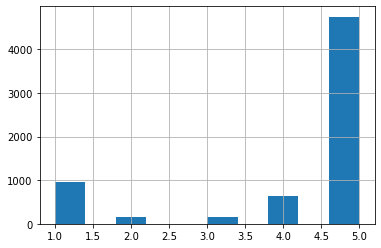

In [122]:
df.ratings.hist()

In [123]:
def rating_to_label(rating) :
  if rating >3:
    return 1
  else:
    return 0
df['y'] = df['ratings'].apply(lambda x : rating_to_label(x))

In [124]:
df

,date,comment,ratings,ko_text,nouns,y
0,2021-03-10,설치하고 오늘 처음 물건 구매해봤는데 앱 사용 시 크게 불편한 점은 없었으나 품목이...,5,설치하고 오늘 처음 물건 구매해봤는데 앱 사용 시 크게 불편한 점은 없었으나 품목이...,[불편],1
1,2021-03-10,사용힌기 편리하고 각종 할인이 잘 돼어 있어 좋아요,5,사용힌기 편리하고 각종 할인이 잘 돼어 있어 좋아요,"[편리, 할인]",1
2,2021-03-10,쿠폰에 빠른배송 GS FRESH 언제까지나 함께합니다.,5,쿠폰에 빠른배송 언제까지나 함께합니다,"[쿠폰, 배송]",1
3,2021-03-09,상품특가있다고 해서 주문했는데 너무 좋아요,5,상품특가있다고 해서 주문했는데 너무 좋아요,"[상품특가, 특가]",1
4,2021-03-09,"행사,기획상품&쿠폰과 같이 실질적으로 고객의 요구에 영향을 주는 카테고리가 잘 나눠...",5,행사기획상품쿠폰과 같이 실질적으로 고객의 요구에 영향을 주는 카테고리가 잘 나눠줘 ...,"[행사기획상품쿠폰, 쿠폰, 실질적, 요구, 영향, 구매자자로, 자로, 편리]",1
...,...,...,...,...,...,...
6642,2014-02-20,편리하고 좋네요 최고어플입니다...gsisuper 애용자로써 무척반가운어플이네요....,5,편리하고 좋네요 최고어플입니다 애용자로써 무척반가운어플이네요,[편리],1
6643,2014-02-19,가동하려면 뭔가 알수 없는 메시지를 내며 죽어버림.. 테스트도 제대로 안하고 올린듯,1,가동하려면 뭔가 알수 없는 메시지를 내며 죽어버림 테스트도 제대로 안하고 올린듯,[가동],0
6644,2014-02-19,쇼핑몰앱 중 훌륭한 편입니다.,5,쇼핑몰앱 중 훌륭한 편입니다,[쇼핑몰앱],1
6645,2014-02-19,쿠폰도 많이 주는 것 같고 수퍼마켓에서도 편하게 쇼핑할수 있을것같네요 앞으로 많은 ...,5,쿠폰도 많이 주는 것 같고 수퍼마켓에서도 편하게 쇼핑할수 있을것같네요 앞으로 많은 ...,[쿠폰],1


In [125]:
df.y.value_counts()

1    5380
0    1267
Name: y, dtype: int64

In [126]:
y= df['y']
X_train,X_test, y_train, y_test = train_test_split(tf_idf_vect, y, test_size = 0.2)

In [127]:
print(X_test.shape)

(1330, 17275)


# 로지스틱 회귀

In [128]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

Test Accuracy: 83.76%


In [129]:
scores = cross_val_score(lr, tf_idf_vect, y, cv=5) # model, train, target, cross validation

print('cross-val-score \n{}'.format(scores))

print('cross-val-score.mean \n{:.3f}'.format(scores.mean()))

cross-val-score 
[0.85112782 0.84661654 0.83671934 0.83521445 0.81188864]
cross-val-score.mean 
0.836


In [130]:
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.81      0.24      0.37       265
           1       0.84      0.99      0.91      1065

    accuracy                           0.84      1330
   macro avg       0.82      0.61      0.64      1330
weighted avg       0.83      0.84      0.80      1330



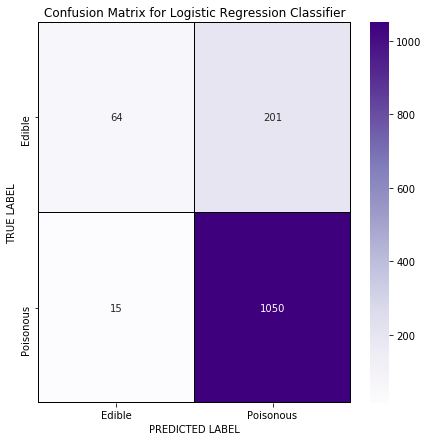

In [131]:
cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
#plt.savefig("lrcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

<BarContainer object of 17275 artists>

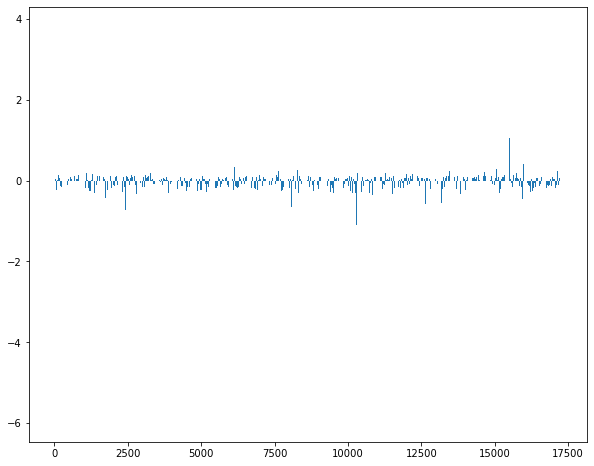

In [132]:
plt.rcParams['figure.figsize'] = [10,8]
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])

In [133]:
coef_pos_index = sorted(((value, index ) for index, value in enumerate(lr.coef_[0])), reverse=True)
coef_neg_index = sorted(((value,index) for index, value in enumerate(lr.coef_[0])), reverse= False)

In [134]:
for coef in coef_pos_index[:50]:
  print(invert_index_vectorizer[coef[1]],coef[0]) #띄어쓰기 ,soynlp konlpy  한국어 

신선 3.8076812026064535
할인 3.4492643203523454
편리하고 3.408045975476111
편리 3.3382855692808393
저렴 3.3341011421928015
심플리쿡 3.1836151309825094
편리하 2.9808004719226577
배송 2.935518241193191
가격 2.87891306084528
편하고 2.7003532267998636
다양 2.6960510885859654
유용 2.6746145512053414
다양한 2.628413973674975
편리합니다 2.563717051820803
간편 2.2824400987156412
편해요 2.2196007926026238
이벤트 2.1991928387276665
세일 2.156577044082382
빠른 2.116033039748164
빠르고 1.9854271035070243
쉽게 1.9782490637228998
혜택 1.883015146642635
당일 1.8781499649188202
편하게 1.8303761948362198
많고 1.6998200442717857
깔끔 1.505902235979288
편해 1.5056875228920952
편하 1.486747100303726
싸게 1.4735098319930857
쉽고 1.2620814826564608
빠르 1.2369019769906358
싸고 1.1543892641359876
특가 1.054629686645004
배달 1.0418364442851518
많네요 1.0412707529691114
편합니다 0.9764281248632821
품질이 0.9221502299195695
많아 0.8748477732585508
좋게 0.8315350903580703
무엇보다 0.7723387216632838
많은 0.706594225136198
실속있는 0.6839812852723797
주셔서 0.6827127746559657
잘사용중입니다 0.6708059241208119
있겠죠ㅜㅜㅜㅜ 0.6622704

In [135]:
for coef in coef_neg_index[:100]:
  print(invert_index_vectorizer[coef[1]], coef[0])

안되 -5.973364985954906
자꾸 -2.884031342956215
느려 -2.7544790904118175
오류 -1.9390039468828812
불편 -1.4655918198597913
안됩니다 -1.3905370608049
느리 -1.355588315377437
결제 -1.311884733711805
멈추고 -1.1015583511261744
없다고 -1.0926477102551289
하네요 -1.0697149394556715
할때마다 -1.0523424693797476
반응속도가 -1.0107378998056826
어렵고 -0.9991696891253684
지우고 -0.9774548598267704
안나오네요 -0.964981437382355
있다고 -0.9484530140586449
멈춤 -0.9075565331505696
않아 -0.8846899373304165
먹통이고 -0.8756853134247293
안뜨고 -0.8492847704471972
복잡하고 -0.7725212005054067
본인인증을 -0.7622459547036119
품절전화도 -0.7561281182858269
느립니다 -0.7553079390579216
말라는거야 -0.7452154420615312
튕기고 -0.7402633894377045
년생이고 -0.7391519776845715
라는 -0.7309608559721718
롯데슈퍼로 -0.7293956155032661
제시간에온적이 -0.719399816716604
힘들었어요 -0.719399816716604
나서 -0.7167651152419652
열받아서 -0.7166776395717889
하래서 -0.705345222880407
실행안됨 -0.6945666594594327
본인인증만 -0.6890042542128224
앱설치하고 -0.6865724784188737
실행이 -0.6853690559552871
보이는 -0.6852291329272382
백지화면 -0.6803051033824161
좋았는데 -0

# 의사결정

In [136]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [137]:
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.64      0.40      0.50       265
           1       0.86      0.94      0.90      1065

    accuracy                           0.84      1330
   macro avg       0.75      0.67      0.70      1330
weighted avg       0.82      0.84      0.82      1330

Test Accuracy: 83.61%


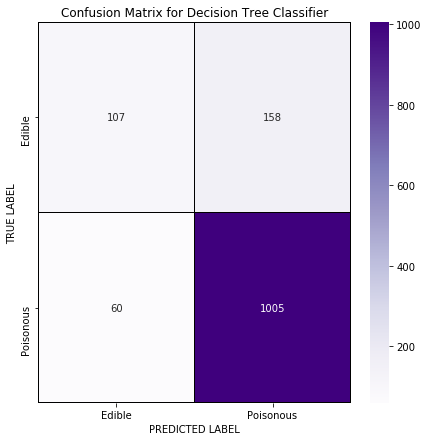

In [138]:
cm = confusion_matrix(y_test, y_pred_dt)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

<BarContainer object of 17275 artists>

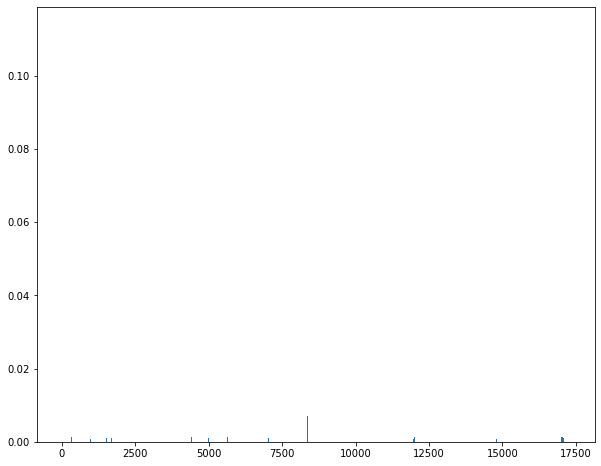

In [139]:
plt.rcParams['figure.figsize'] = [10,8]
plt.bar(range(len(dt.feature_importances_)), dt.feature_importances_)

In [140]:
coef_pos_index = sorted(((value, index ) for index, value in enumerate(dt.feature_importances_)), reverse=True)
coef_neg_index = sorted(((value,index) for index, value in enumerate(dt.feature_importances_)), reverse= False)

In [141]:
for coef in coef_pos_index[:100]:
  print(invert_index_vectorizer[coef[1]])

안되
오류
불편
느려
결제
자꾸
할인
배송
가격
쿠폰
앱이
이벤트
당일
안됩니다
혜택
편하게
편리하고
신선
없다고
있다고
않아
빠른
저렴
느리
심플리쿡
편리하
편리
세일
다양
유용
간편
편하고
편리합니다
많아
ㅠㅠ
다양한
깔끔
편해요
많은
안된다고
배달
쉽게
앱도
안나오네요
주세요
빨리
나서
없는
일에
안옴
하게
먹통이고
좋겠네요
준다고
이럴거면
잘썼는데
지우고
어쩌라고
아오
알고
아깝네요
없다
모든
점점
같은
것도
버튼이
멈추고
눈에
나네요
편해
싶어서
아까울정도
이마트로
접속상태
앱카드
말고
백지화면
임시비번
바뀌고
띄우고
시도하다
인트로
울리는
같네요
빡쳐서
본인인증만
어렵고
말라는거야
바꾸고
알람
답답하게
변하고
본인인증을
년생이고
홈플이나
심하고
지움
되는게
느린


In [142]:
for coef in coef_neg_index[:100]:
  print(invert_index_vectorizer[coef[1]])

ㅇ할인혜택도좋구요
ㅠㅠㅎ
ㅠㅠㅠㅠㅠㅠㅜㅜㅜㅜㅜㅠ
ㅠㅠ지에스좋은데
ㅠㅡㅠ
ㅠ판매안하시죵
ㅡㅡㅋㅋ
ㅡㅡ개선좀해주세요
ㅡㅡ솔찍히
ㅡ곳은
ㅡ나쳐걸려서
ㅡ분걸림
ㅡ서비스는
ㅡ착한
가게되네요
가게부에
가계부에
가계에
가고
가공식품과
가공식품을
가구가
가구에게
가구요
가기가
가기도
가기에
가까우니까
가까운
가까운곳에
가까운곳이라
가까운매장에서
가까운매장에서바로바로받을수
가까운지점에서
가까움ㅋㅋ
가까워서
가깝고
가네요
가네욬ㅋㅋㅋㅋㅋ
가느라
가는
가는거
가는것
가는게
가는데
가는하니
가다가
가독성
가독성도
가독성이
가동하는데
가동하려면
가동해야
가득
가득가득
가득하고
가득하네요
가득한
가득합니다
가득해
가뜩이나
가라고
가라는
가란다
가려가며
가려면
가려져서
가렵니다
가로에다가
가만히
가면갈수록
가방
가버리고타마트
가벼운마음으로
가벼워졌습니당
가벼워졌어요
가볍게
가볍고
가보니까
가보면
가봤더니
가서
가서사고말지
가서찾기눌럿더니
가성비
가성비가
가성비좋네요
가성비좋은지에스프레쉬
가시성도
가시성이
가식성이
가야할
가야했는데
가있어서
가장많이
가장자리에
가전제품이
가점
가정경제에도
가정에


# KNN

In [143]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    if knn.score(X_test, y_test) > best_score:
        best_score = knn.score(X_train, y_train)
        best_Kvalue = i
        
print("Best KNN Value: {}".format(best_Kvalue))
print("Test Accuracy: {}%".format(round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 99.49%


In [144]:
y_pred_knn = knn.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))


KNN Classifier report: 

               precision    recall  f1-score   support

           0       0.33      0.02      0.03       265
           1       0.80      0.99      0.89      1065

    accuracy                           0.80      1330
   macro avg       0.57      0.50      0.46      1330
weighted avg       0.71      0.80      0.72      1330



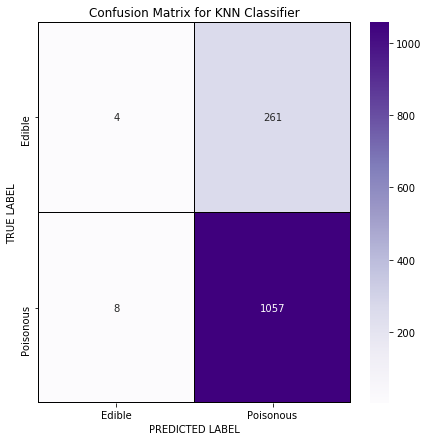

In [145]:
cm = confusion_matrix(y_test, y_pred_knn)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
#plt.savefig("knncm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

# svm

In [146]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))


Test Accuracy: 80.08%


In [147]:
y_pred_svm = svm.predict(X_test)
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_svm))

SVM Classifier report: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       265
           1       0.80      1.00      0.89      1065

    accuracy                           0.80      1330
   macro avg       0.40      0.50      0.44      1330
weighted avg       0.64      0.80      0.71      1330



C:\Users\jby\AppData\Local\Continuum\anaconda3\envs\textmining\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


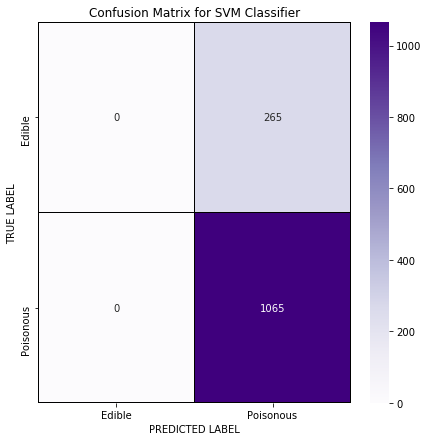

In [148]:
cm = confusion_matrix(y_test, y_pred_svm)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')
#plt.savefig("svmcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

# 랜덤포레스트

In [149]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

Test Accuracy: 84.81%


In [150]:
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       0.82      0.30      0.44       265
           1       0.85      0.98      0.91      1065

    accuracy                           0.85      1330
   macro avg       0.84      0.64      0.68      1330
weighted avg       0.84      0.85      0.82      1330



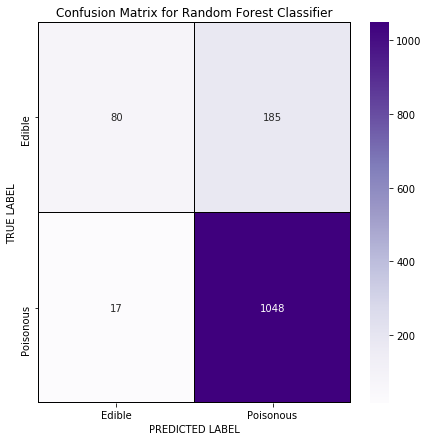

In [151]:
cm = confusion_matrix(y_test, y_pred_rf)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier');
#plt.savefig("rfcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

<BarContainer object of 17275 artists>

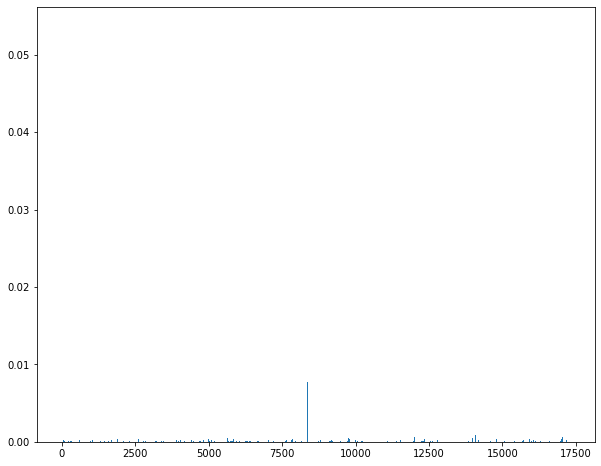

In [152]:
plt.rcParams['figure.figsize'] = [10,8]
plt.bar(range(len(rf.feature_importances_)), rf.feature_importances_)

In [153]:
coef_pos_index = sorted(((value, index ) for index, value in enumerate(rf.feature_importances_)), reverse=True)
coef_neg_index = sorted(((value,index) for index, value in enumerate(rf.feature_importances_)), reverse= False)

In [154]:
for coef in coef_pos_index[:100]:
  print(invert_index_vectorizer[coef[1]], coef[0])

안되 0.05351273668182688
오류 0.022836186947075936
불편 0.012329979814894153
자꾸 0.01080763089207704
할인 0.010502195299013148
배송 0.009611949231874408
느려 0.009503720873588204
결제 0.009270007146110985
신선 0.0076851032491914275
편리 0.006161011357432696
안됩니다 0.00608730388415671
느리 0.005880009567856176
편리하고 0.005736294332245767
저렴 0.005710973919790254
가격 0.004091567253246898
이벤트 0.003723274465068838
편리하 0.0036082417811516103
다양 0.00332415229062624
심플리쿡 0.003316465036459533
없다고 0.003264828188715957
지우고 0.0029364729963391586
빠르고 0.0029357475214330767
멈추고 0.0027773440301130763
편하고 0.0027298110263025014
앱이 0.0026320511839652842
간편 0.002621124784160636
빨리 0.0023776994092725317
다양한 0.002318793809929335
있다고 0.0023023984676458966
쿠폰 0.0022908906572259432
않아 0.0022297235627546
많고 0.002150344899640024
안된다고 0.002127105161384868
하네요 0.0021041359533354
당일 0.0020661379828487677
세일 0.0020319329895861693
빠른 0.0019969036623343614
안뜨고 0.0019100150852646436
할때마다 0.0018790181915493425
편하게 0.001719757368074181
유용 0.001707

In [155]:
for coef in coef_neg_index[:100]:
  print(invert_index_vectorizer[coef[1]])

ㅠㅠㅎ
ㅠㅠ지에스좋은데
ㅠㅡㅠ
ㅡ곳은
ㅡ분걸림
ㅡ서비스는
가구가
가까운곳이라
가까움ㅋㅋ
가는데
가는하니
가득하네요
가라고
가려가며
가려져서
가버리고타마트
가벼워졌습니당
가보니까
가봤더니
가서찾기눌럿더니
가식성이
가야할
가져다주는
가져다준다니까요
가지게
가지런하게
각도를
각성하셔야
각종할인이
간가요
간간이
간거같으면서
간단결제
간단했고
간식거리도
간식으로
간식이랑
간헐적으로
간혈적으로
갈때마다
갈래야
갈수가
갈수밖에
갈아타려고
갈아타야겠어요
갈아탄
갈아탄지
갈아탈일
갈아탑니다
감감무소식참다참다
감기
감동감동
감바스알하이오
감바스의
감이
감점
감탄하며
갑니당
갑이네요
갑자기이러네
갑작스럽게
갑작스레
값싸게
값에
갔네요
갔다하면
갔더니
갔어요
강력추천
강제종료가
강제종료되버려
강제종료되버려서
강추드립니다
강추요
강추인걸요
강추합니닷
강추해주고
강화해주시면
갖다버리시오
갖다주시니
갖추다니
갖춰주시길
같았는데
같을
같이되나요
같진
개같이
개떡같고
개떡이네
개똥
개만오고
개미지옥이예요
개발과
개발관리가
개발자님아
개발자분들
개변될때마다
개불편함
개빡칩니다
개시켰는데


# 라쏘

In [156]:
alpha = 0.00001
lasso = Lasso(alpha=alpha,random_state=42)
lasso.fit(X_train, y_train)
print("X_train,y_train Accuracy: {}%".format(round(lasso.score(X_train, y_train)*100, 2)))
print("X_test,y_test Accuracy: {}%".format(round(lasso.score(X_test, y_test)*100, 2)))
pred = lasso.predict(X_test)
print(f"lasso alpha{alpha} y_test,pred Mse",mean_absolute_error(y_test, pred))
print(f"lasso alpha{alpha} y_test,pred SQRT Mse",np.sqrt(mean_squared_error(y_test, pred)))

X_train,y_train Accuracy: 94.05%
X_test,y_test Accuracy: 18.15%
lasso alpha1e-05 y_test,pred Mse 0.19315433695720913
lasso alpha1e-05 y_test,pred SQRT Mse 0.3613768893506452
